In [1]:
import init_notebook
%load_ext autoreload
%autoreload 2
import numpy as np

In [5]:
import datetime
import glob
from os import path
import warnings

import numpy as np
import matplotlib.pyplot as plt

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import stage.utils.directory_settings as directories
from pyat.core.DTM.DiffGeotiff import DiffGeotiff
from stage.dtm.dtm_computer import GeotiffGenerator
from stage.utils.export_geotiff import Export_File
from stage.dtm.geotiff_normal_computer import GeoTiffNormalComputer
from stage.backscatter_processing.incidence_angle_computer import IncidenceAngleComputer
from stage.backscatter_processing.insonified_area_computer import InsonifiedAreaComputer
from stage.utils.nc_file_cache import XSFFile

warnings.filterwarnings('ignore')
show_figure_immediately = False

In [6]:
# We want to check if every step is correct
# We will compare our result with sonarscope

In [7]:
our_mnt = directories.output_dir + "2019_10_31_08_50_46.tif"
sonarscope_dtm = (
    directories.input_directory
    + "/SurveyReport/all/SurveyReport/stage/GEOTIF/stage-DTM_1,5m_LatLong_Bathymetry-53088.tif")
now = datetime.datetime.now()
diff_depth_dtm = path.join(
    directories.output_dir,
    "dtm_difference_with_sonarscope_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

In [8]:
diff = DiffGeotiff()
diff.compute(sonarscope_dtm, our_mnt, diff_depth_dtm)

AttributeError: 'NoneType' object has no attribute 'GetProjection'

Mean :  -90.54141
Max :  -82.65267
Min :  -93.82559
Median :  -90.557274
Std :  0.78518623
                                        MNT from Sonarscope                                         


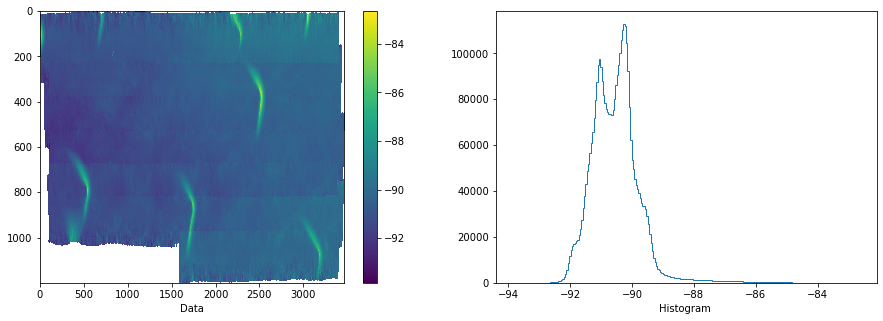

In [6]:
scope.display_geotiff_data(
    file_name=sonarscope_dtm,
    title="MNT from Sonarscope",
    show=show_figure_immediately,)

Mean :  -90.550224
Max :  -82.580696
Min :  -93.96176
Median :  -90.565636
Std :  0.78547937
                                           MNT from pyat                                            


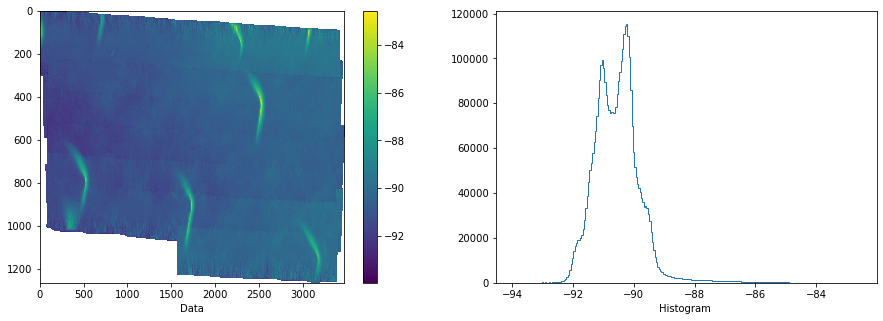

In [7]:
scope.display_geotiff_data(
    file_name=our_mnt,
    title="MNT from pyat",
    show=show_figure_immediately,)

Mean :  0.07377241
Max :  6.417412
Min :  0.0
Median :  0.045921326
Std :  0.10049105
                                   MNT difference with sonarscope                                   


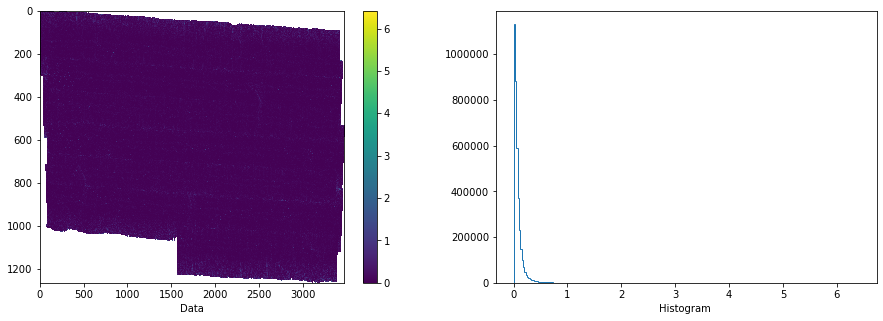

In [8]:
scope.display_geotiff_data(
    file_name=diff_depth_dtm,
    title="MNT difference with sonarscope",
    show=show_figure_immediately,)

In [9]:
our_Max_slope = directories.output_dir + "max_slope_degree2019_10_31_08_50_46.tif"
sonarscope_slope_dtm = (
    directories.input_directory
    + "/SurveyReport/all/SurveyReport/stage/GEOTIF/stage-DTM_1,5m_slopeMax_LatLong_SlopeMax-53088.tif")
diff_slope_geotiff = path.join(
    directories.output_dir,
    "slope_difference_with_sonarscope" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

Mean :  2.283161
Max :  62.554634
Min :  0.00032440491
Median :  1.5632759
Std :  2.4448016
                                     Max slope from Sonarscope                                      


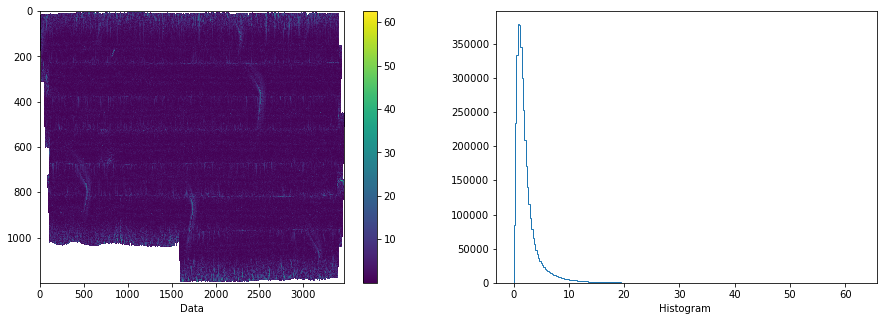

In [10]:
scope.display_geotiff_data(
    file_name=sonarscope_slope_dtm,
    title="Max slope from Sonarscope",
    show=show_figure_immediately,)

Mean :  3.2962132
Max :  68.02314
Min :  0.0017553585
Median :  2.3591745
Std :  3.2409368
                                        Max slope from pyat                                         


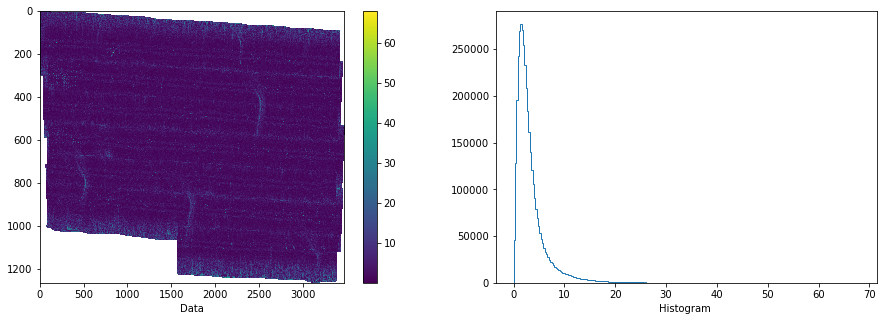

In [11]:
scope.display_geotiff_data(
    file_name=our_Max_slope,
    title="Max slope from pyat",
    show=show_figure_immediately,)

Mean :  1.634173
Max :  49.383
Min :  5.9604645e-08
Median :  1.0311852
Std :  2.0311968
                                Max slope difference with sonarscope                                


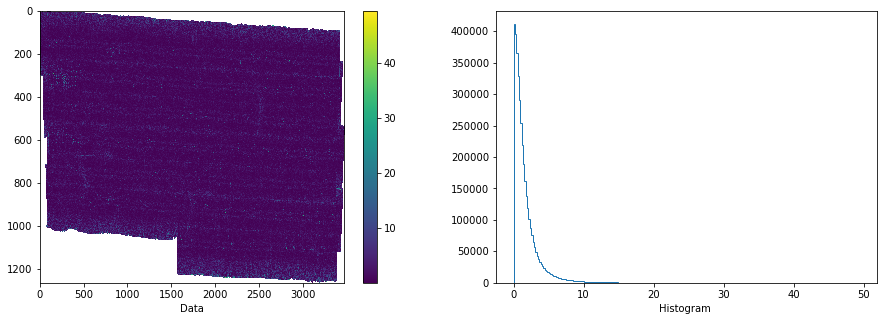

In [12]:
diff.compute(sonarscope_slope_dtm, our_Max_slope, diff_slope_geotiff)
scope.display_geotiff_data(
    file_name=diff_slope_geotiff,
    title="Max slope difference with sonarscope",
    show=show_figure_immediately,)

In [13]:
our_incidence_angle = directories.output_dir + "incidence_angle_2019_10_31_08_50_07.tif"
sonarscope_incidence_angle = ( directories.input_directory + directories.sonarscope_equation +
                             "0032_20180914_183119_ShipName_PingBeam_IncidenceAngle.tif")
diff_incidence_angle_geotiff = path.join(
    directories.output_dir,
    "incidence_angle_difference_with_sonarscope" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

Mean :  0.11074433
Max :  90.55042
Min :  -79.15889
Median :  1.0372596
Std :  50.62329
                                     sonarscope incidence angle                                     


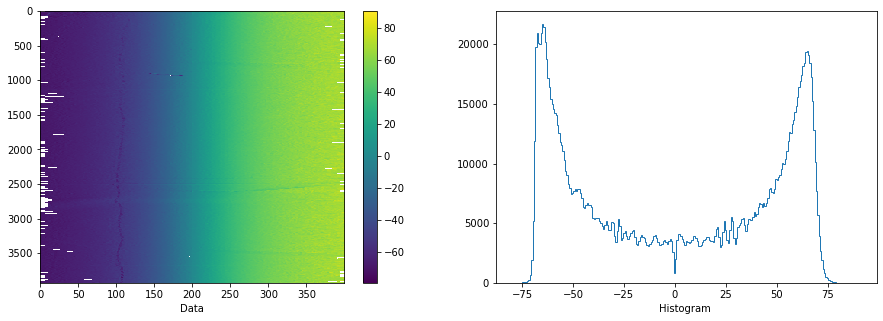

In [14]:
scope.display_geotiff_data(
    sonarscope_incidence_angle,
    "sonarscope incidence angle",
    show=show_figure_immediately,)

Mean :  -0.2526475
Max :  103.17929
Min :  -97.531784
Median :  -1.043023
Std :  46.861465
                                        Pyat incidence angle                                        


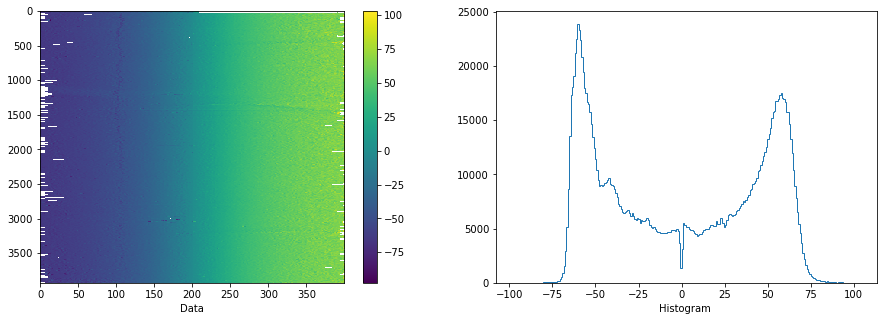

In [15]:
scope.display_geotiff_data(
    our_incidence_angle,
    "Pyat incidence angle",
    show=show_figure_immediately,)

In [16]:
calculated_angle = np.rot90(tiff.read_tiff(our_incidence_angle), 2).transpose()
sonarscope_angle = np.rot90(tiff.read_tiff(sonarscope_incidence_angle), 1)
diff_angle = np.abs(calculated_angle)-np.abs(sonarscope_angle)

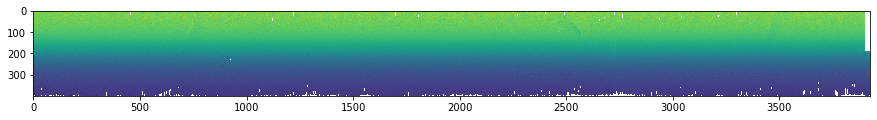

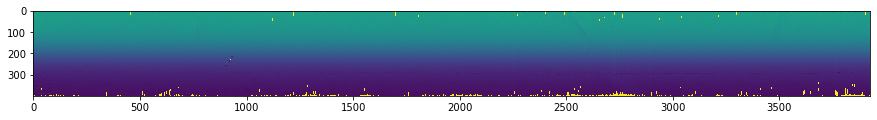

In [17]:
fig = plt.figure(figsize=(15, 5))
plt.imshow(calculated_angle)
fig = plt.figure(figsize=(15, 5))
plt.imshow(sonarscope_angle)
plt.show()

Mean :  -3.7856622
Max :  60.54574
Min :  -128.77179
Median :  -3.9340496
Std :  3.5515373
                             incidence angle difference with sonarscope                             


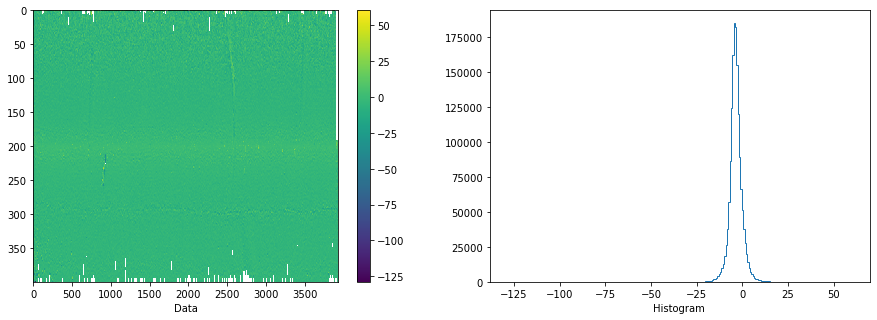

In [18]:
scope.display_matrix(diff_angle,  "incidence angle difference with sonarscope", show=show_figure_immediately)

In [19]:
our_insonified_area = directories.output_dir + "insonified_area_dB_2019_11_26_10_44_24.tif"
sonarscope_insonified_area = ( directories.input_directory + directories.sonarscope_equation +
                             "0032_20180914_183119_ShipName_SSc_PingBeam_InsonifiedAreadB.tif")
diff_incidence_angle_geotiff = path.join(
    directories.output_dir,
    "insonified_area_difference_with_sonarscope" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

In [20]:
calculated_area = np.rot90(tiff.read_tiff(our_insonified_area), 2).transpose()
sonarscope_area = np.rot90(tiff.read_tiff(sonarscope_insonified_area), 1)
sonarscope_area [sonarscope_area == 18] = np.nan
diff_area = np.abs(calculated_area)-np.abs(sonarscope_area)

Mean :  -0.9507662
Max :  7.531758
Min :  -4.4415035
Median :  -1.4449925
Std :  1.8883184
                                        Pyat incidence angle                                        


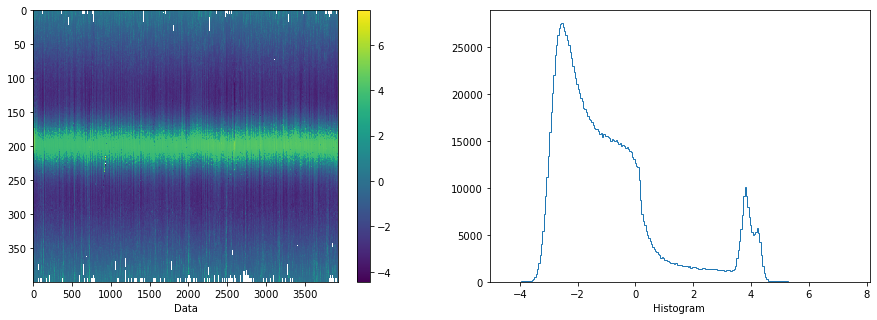

In [21]:
scope.display_matrix(
    calculated_area,
    "Pyat incidence angle",
    show=show_figure_immediately,)

Mean :  -1.3849124
Max :  8.103433
Min :  -4.674449
Median :  -1.8400712
Std :  1.6577528
                                     Sonarscope insonified area                                     


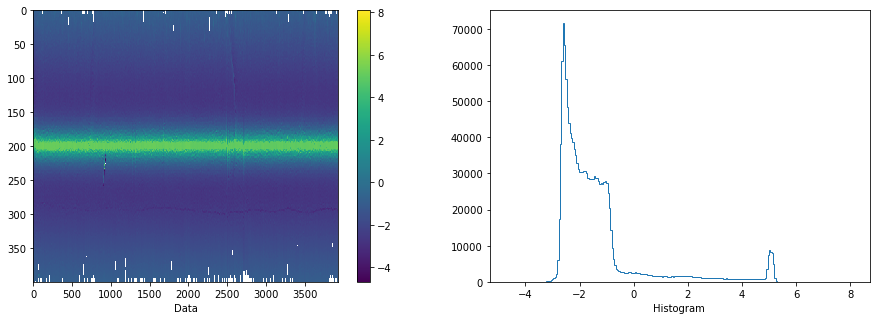

In [22]:
scope.display_matrix(
    sonarscope_area,
    "Sonarscope insonified area",
    show=show_figure_immediately,)

Mean :  -0.15981199
Max :  7.033285
Min :  -7.2784433
Median :  -0.23188043
Std :  0.7460714
                           Difference of Insonified Area with sonarscope                            


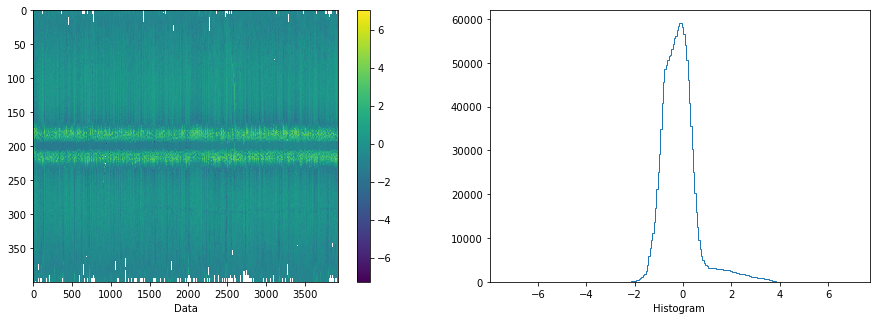

In [23]:
scope.display_matrix(
    diff_area,
    "Difference of Insonified Area with sonarscope",
    show=show_figure_immediately,)

In [24]:
sonarscope_reflectivity = ( directories.input_directory + directories.sonarscope_equation +
                             "0032_20180914_183119_ShipName_SSc_Step1_PingBeam_Reflectivity.tif")
our_reflectivity = "C:/Users/krodrigu/Documents/pyat/reflectivity_dB_2019_11_26_10_44_24.tif"

In [25]:
calculated_reflectivity = np.rot90(tiff.read_tiff(our_reflectivity), 2).transpose()
sonarscope_reflectivity = np.rot90(tiff.read_tiff(sonarscope_reflectivity), 1)
sonarscope_reflectivity[sonarscope_reflectivity == 18] = np.nan
diff_reflectivity = np.abs(calculated_reflectivity)-np.abs(sonarscope_reflectivity)

Mean :  -15.3095255
Max :  9.237072
Min :  -52.11527
Median :  -15.355058
Std :  4.496049
                                       Reflectivity computed                                        


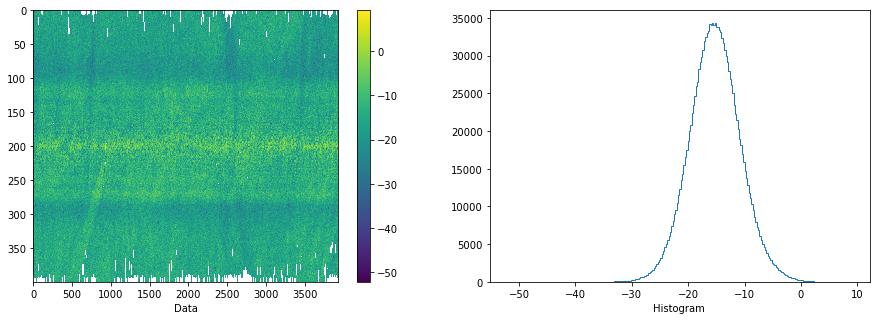

In [26]:
scope.display_matrix(calculated_reflectivity, "Reflectivity computed", True)

In [27]:
scope.display_matrix(sonarscope_reflectivity, "Reflectivity from sonarscope", True)

Mean :  -15.202589
Max :  8.864365
Min :  -49.674374
Median :  -15.355325
Std :  4.654226
                                    Reflectivity from sonarscope                                    


In [28]:
scope.display_matrix(diff_reflectivity, "Difference of reflectivity with sonarscope", True)

Mean :  0.11414335
Max :  10.7282295
Min :  -15.049553
Median :  -0.08517742
Std :  0.80862373
                             Difference of reflectivity with sonarscope                             


In [29]:
reflectivity_mean =np.zeros((calculated_reflectivity.shape[0]))
for i in range (calculated_reflectivity.shape[0]):
    reflectivity_mean[i] = np.nanmean(calculated_reflectivity[i, :])

In [30]:
incidence_mean =np.zeros((calculated_angle.shape[0]))
for i in range (calculated_angle.shape[0]):
    incidence_mean[i] = np.nanmean(calculated_angle[i, :])

In [31]:
ssc_reflectivity_mean = np.zeros((sonarscope_reflectivity.shape[0]))
for i in range (sonarscope_reflectivity.shape[0]):
    ssc_reflectivity_mean[i] = np.nanmean(sonarscope_reflectivity[i, :])

In [32]:
sonarscope_angle [sonarscope_angle == 182] = np.nan
ssc_incidence_mean =np.zeros((sonarscope_angle.shape[0]))
for i in range (sonarscope_angle.shape[0]):
    ssc_incidence_mean[i] = np.nanmean(sonarscope_angle[i, :])

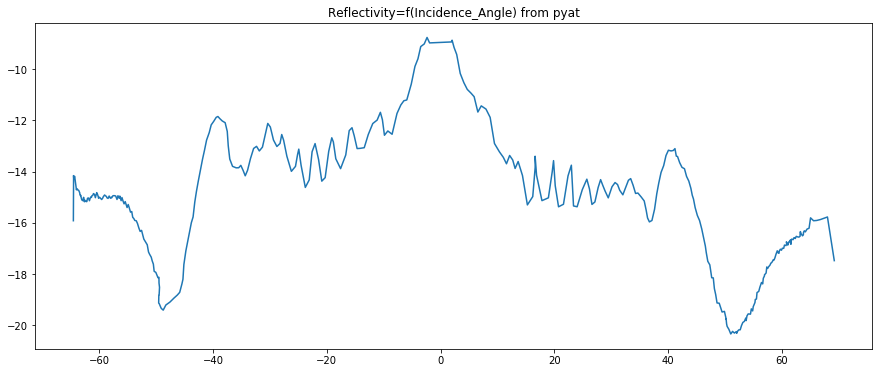

In [33]:
fig = plt.figure(figsize=(15,6))
plt.title('Reflectivity=f(Incidence_Angle) from pyat')
plt.plot(incidence_mean, reflectivity_mean)
plt.show()

In [34]:
fig = plt.figure(figsize=(15,6))
plt.title('Reflectivity=f(Incidence_Angle) from sonarscope')
plt.plot(ssc_incidence_mean, ssc_reflectivity_mean)
plt.show()

In [35]:
fig = plt.figure(figsize=(15,6))
plt.title('Plot of two graphs')
plt.plot(ssc_incidence_mean, ssc_reflectivity_mean)
plt.plot(incidence_mean, reflectivity_mean)
plt.show()

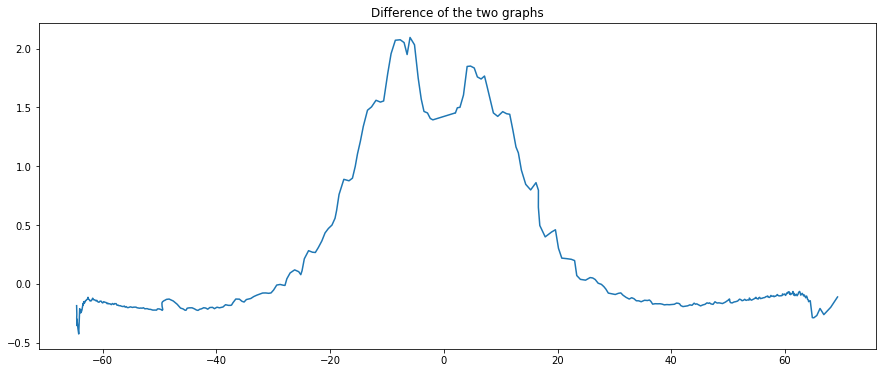

In [36]:
fig = plt.figure(figsize=(15,6))
plt.title('Difference of the two graphs')
plt.plot(incidence_mean, ssc_reflectivity_mean - reflectivity_mean)
plt.show()